____

<font size=+3 color=#AA55FF> HW 6: Decision Trees, SVC (more!) and Dimensionality Reduction </font>

____

In [21]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from mlxtend.plotting import plot_decision_regions
from sklearn.metrics import accuracy_score

____

<font size=+2 color=#FFAA00> Problem 1: Imbalanced Dataset (20 points) </font>

____

In this problem you will examine a very unbalanced dataset. Your first tasks are:
* read through the code below and comment as needed
* what does this code do?
* how do you control how balanced, or not, this dataset is?
* how well do you think an SVM will be able to perform classification with this dataset?
* what other insights do you have? 

---
Answer:
* This code generates synthetic data, creates labels based on a condition, and then plots the data with labels.
* To control the balance of the dataset, you can adjust the condition used to assign labels. Currently, the condition XX[:,0]<0.85) & (XX[:,0]>0.45 assigns about 30% of the data as positive instances. Changing this condition will alter the balance of the dataset.
* It's possible to predict that SVM might struggle with this dataset because it appears that a single linear decision boundary may not be sufficient to effectively separate the two classes. In the visualization, if the classes are not linearly separable, SVM's performance could indeed be limited.
* Dimensionality reduction could indeed be a valuable approach in cases where the dataset has a large number of features or when the features are highly correlated.


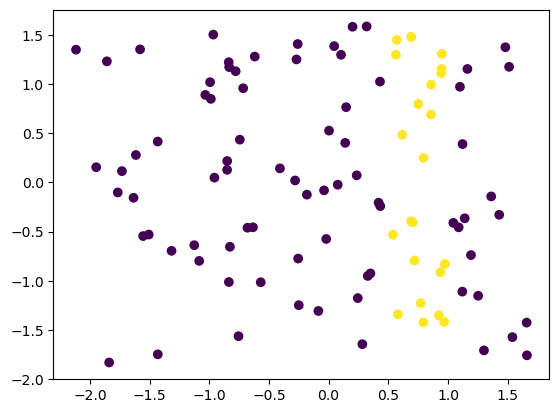

In [35]:
# create fake features and scale
XX = np.random.random([100,2])
yy = np.zeros(len(XX[:,0]))
scaler = StandardScaler()
scaler.fit(XX)
XX = scaler.transform(XX)

# create targets/labels
yy[(XX[:,0]<1) & (XX[:,0]>0.45)] = 1

# check to see if it worked
plt.scatter(XX[:,0], XX[:,1], c=yy)

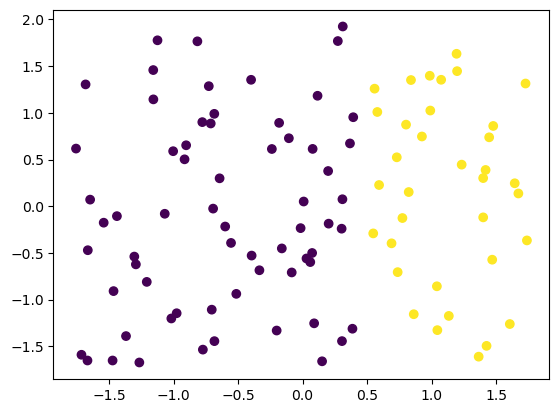

In [22]:
# create fake features and scale
XX1 = np.random.random([100,2])
yy1 = np.zeros(len(XX1[:,0]))
scaler = StandardScaler()
scaler.fit(XX1)
XX1 = scaler.transform(XX1)

# create targets/labels
yy1[(XX1[:,0]<2) & (XX1[:,0]>0.45)] = 1

# check to see if it worked
plt.scatter(XX1[:,0], XX1[:,1], c=yy1)

Great. Let's keep going. 

Comment the code below. Can you answer some of the questions above more precisely using this code? 
* does the SVM easily perform the classification?
* vary the balance in the dataset; does it improve? (that is, do you see a region surrounding both classes?)
* check the accuracy (score) and compare to the relative sizes of the classes - it the SVC simply choosing the largest class?
* give a detailed summary of what you have found and any concerns you might have

---
Answer:

Changing the condition used to assign labels (yy) from XX[:,0]<0.85) & (XX[:,0]>0.45 to XX[:,0]<2) & (XX[:,0]>0.45) effectively broadens the range of instances labeled as positive. This change could potentially make the dataset easier for an SVM to train on because it creates a more distinct separation between the two classes.

With the new condition, more instances will be labeled as positive, leading to a higher density of positive instances in the feature space. As a result, it might be easier for the SVM to find a suitable decision boundary to separate the classes effectively.

The baseline accuracy is equal to the accuracy obtained from the SVM classifier, it suggests that the SVM classifier is essentially making predictions equivalent to simply choosing the majority class for all instances. This implies that the classifier is not effectively learning from the features but instead is biased towards the majority class.


Changing the boundary condition to yy[(XX[:,0]<2) & (XX[:,0]>0.45)] = 1 results in assigning more instances to the positive class compared to the previous condition yy[(XX[:,0]<0.85) & (XX[:,0]>0.45)] = 1. This change makes the dataset more easier to separate the two classed, resulting in a higher SVM accuracy.

The SVM accuracy after this change is significantly higher than the baseline accuracy, it suggests that the SVM classifier is learning meaningful patterns from the features and effectively discriminating between the classes. 

If the SVM accuracy closely matches the baseline accuracy, it raises concerns about the separability of the classes in the feature space. The inability of the SVM to outperform the baseline accuracy suggests that the classes might not be linearly separable or that the features do not sufficiently capture the differences between the classes.

Baseline Accuracy: 0.78
SVM Accuracy: 0.78


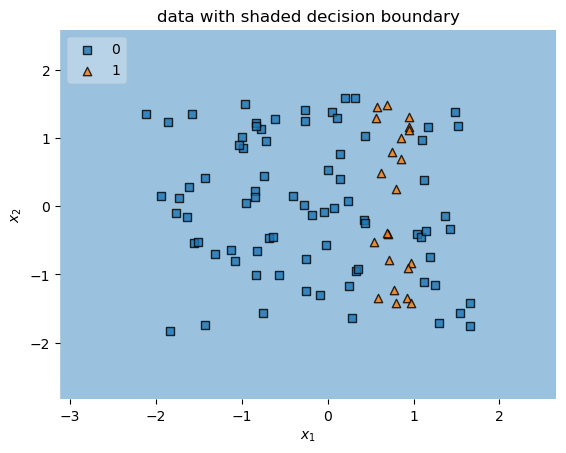

In [36]:
my_clf = svm.SVC(kernel = 'rbf')
my_clf.fit(XX, yy)
plot_decision_regions(XX, yy.astype(np.int_), clf=my_clf, legend=2)
plt.title("data with shaded decision boundary")
plt.ylabel('$x_2$')
plt.xlabel('$x_1$')

baseline_accuracy = max(np.mean(yy == 0), np.mean(yy == 1))
# Predict labels using the trained classifier
y_pred = my_clf.predict(XX)

# Calculate accuracy
svm_accuracy = accuracy_score(yy, y_pred)

print("Baseline Accuracy:", baseline_accuracy)
print("SVM Accuracy:", svm_accuracy)

Baseline Accuracy: 0.65
SVM Accuracy: 1.0


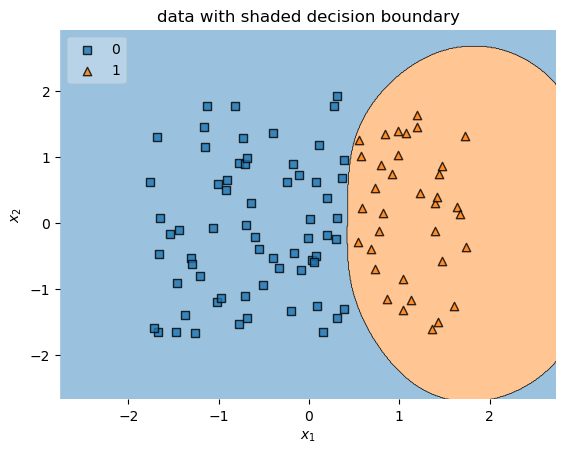

In [37]:
my_clf = svm.SVC(kernel = 'rbf')
my_clf.fit(XX1, yy1)
plot_decision_regions(XX1, yy1.astype(np.int_), clf=my_clf, legend=2)
plt.title("data with shaded decision boundary")
plt.ylabel('$x_2$')
plt.xlabel('$x_1$')

baseline_accuracy = max(np.mean(yy1 == 0), np.mean(yy1 == 1))
# Predict labels using the trained classifier
y_pred = my_clf.predict(XX1)

# Calculate accuracy
svm_accuracy = accuracy_score(yy1, y_pred)

print("Baseline Accuracy:", baseline_accuracy)
print("SVM Accuracy:", svm_accuracy)

____

<font size=+2 color=#FFAA00> Problem 2: Final Project Proposal </font>

____

Next week (not this week!) you will write a full and final proposal for your project. You will need to lock things down at this point. If there are any issues, please contact me right away. 

Review in your mind where you were before spring break and the feedback you got. Reread Appendix A in your textbook to ensure you understand the entire workflow that is expected of you. Write me a message with any concerns you have: because every project is unique, no set of rules can match all of the amazing things you and your colleagues are doing!

In your proposal, there is something I want you to pay attention to: the tone of how it is written. Here's the idea:
* do not write this to me (and Mahyar!) from you
    * I understand that you have spent about 20 years of your life writing from you to your instructor because the instructor needed to understand what you know to give you a grade; that is **not** the goal here
    * you have also been trained to write in useless (sorry!) formats, such as the "three-paragraph essay" (when was the last time you read one??)
    * it's time to become a professional
* think about the _goals_ of your project
    * what value are you adding?
    * what tension or instabilty in the world are you resolving? 
    * what impact do you expect?
    * who cares and how will they use your result?
    * why would your company pay for this work?

In particular, think about how the answers to these questions impact the ML workflow you are designing. As we have seen in the lecture, your goal can influence what you do, as with the example of shifting the decision boundary for a cancer diagnosis. The ML needs to match your goals.

What you won't say:
* in this project I.....

What you will say:
* this result allows users to....


 
Your final project proposal (next week) will require extensive preliminary results. For this problem, get started: think through this and start coding and writing so that you are not overwhelmed next week. 



____

<font size=+2 color=#FFAA00> Problem 3: Dimensionality Reduction (20 points) </font>

____

Read Chapter 8 of your textbook. 

In markdown cells below, answer these questions from that chapter: 1, 3, 5, and 8.

---

1. What are the main motivations for reducing a dataset’s dimensionality? What are the main drawbacks?
   * Reduced computational complexity and reduced model generalization performance. In a compressing way. 
   * Extract a lower-dimensional representation of data while preserving as much relevant information as possible, facilitating easier interpretation and visualization of the underlying patterns.
   * Insightful Visualization: It aids in visualizing data, highlighting critical features, and providing insights into underlying patterns, facilitating better understanding of the dataset.
   
   Drawbacks:
   * Information Loss: Reduction inevitably leads to information loss, which may degrade the performance of subsequent training algorithms, particularly if critical features are discarded.
   * Computational Intensity: Dimensionality reduction processes can be computationally intensive, especially for large datasets, potentially increasing training time and resource requirements.

3. Once a dataset’s dimensionality has been reduced,is it possible to reverse the operation? If so, how? If not, why?
   
   After reducing a dataset's dimensionality using one of the discussed algorithms, it's nearly impossible to perfectly reverse the operation due to inevitable information loss. While certain algorithms like PCA offer a straightforward reverse transformation procedure that can reconstruct a dataset relatively similar to the original, others like t-SNE lack such a capability.

5. Suppose you perform PCA ona 1,000-dimensional dataset,setting the explained variance ratio to 95%. How many dimensions will the resulting dataset have?

   The extent to which dimensionality can be reduced depends on the dataset, typically falling within a range of 1 to 950 dimensions.

8. Does it make any sense to chain two different dimensionality reduction algorithms?

   Combining two distinct dimensionality reduction algorithms can be highly effective. For instance, a common strategy involves employing MDS or PCA initially to eliminate numerous irrelevant dimensions swiftly. Subsequently, a slower algorithm like LLE may be applied for finer dimensionality reduction. This two-step process often delivers comparable performance to using LLE alone but within a significantly reduced time frame. Like what we do in the class use MDS and LLE

____

<font size=+2 color=#FFAA00> Problem 4: Visualizing PCA's Dimensionality Reduction (20 points) </font>

____

In this problem you are going to illustrate visually what PCA does. Your first task is to create a fake dataset $X_0$ with a controlled variance structure in 3D. Do that now. Use Plotly to visualize your dataset so that you can rotate the data to examine its topologial structure. 

If you need a hint, you can uncomment the code below; comment it if you use it. Otherwise, just ignore it; there are many ways to do this.

Second, find the SVD of the data matrix $X_0$ you created (with `linalg`). From that SVD, create two new datasets by:
* setting the smallest singular value to 0, and then reconstructing a new $X_1$
* setting the _two_ smallest SVs to 0, and then reconstructing a new $X_2$.

Be sure that $X_0$, $X_1$ and $X_2$ all have the same shape, just with a slightly different SVD. It is only the values in $\Sigma$ that differ among the datasets.

Third, make a 3D Plotly scatter plot with $X$, $X_1$ and $X_2$. In a markdown cell, comment on your findings. How would you describe the structure/topology of the datasets you see visually?

---

Answer:

##### Original Dataset (X0):

The original dataset appears to have a clustered structure with some level of correlation between the variables.
Points in the dataset are distributed in a manner that suggests a certain level of curvature or correlation between the dimensions.

##### Modified Datasets (X1 and X2):

X1: After setting the smallest singular value to 0 and reconstructing the dataset, there might be a reduction in dimensionality along one of the axes. This reduction might lead to a flattening effect or a compression of the dataset along that dimension.

X2: Setting the two smallest singular values to 0 might result in a more significant reduction in dimensionality compared to X1. This could lead to further flattening or compression of the dataset along multiple dimensions, potentially altering the overall shape and structure.


In [57]:
import plotly.express as px
import pandas as pd

# create controllable covariance dataset
mean = [0, 0, 0]
cov_matrix = np.array([[1, 0.8, 0.5],
       [0.8, 1, 0.3],
       [0.5, 0.3, 1]]) # this is covariance matrix of X_0
x, y, z = np.random.multivariate_normal(mean, cov_matrix, 100).T

# create data matrix X
X_0 = np.vstack((x, y, z)).T


# Calculate the Singular Value Decomposition (SVD) of X0
U, S, Vt = np.linalg.svd(X_0)

# Create new datasets by setting singular values to 0
# For X1, set the smallest singular value to 0
S_1 = np.copy(S)
S_1[-1] = 0


# For X2, set the two smallest singular values to 0
S_2 = np.copy(S)
S_2[-2:] = 0

# create two more datasets with zero SVs
X_1 = np.dot(U[:, :len(S_1)] * S_1, Vt)
X_2 = np.dot(U[:, :len(S_2)] * S_2, Vt)

# Plotly likes to use dataframes
df_0 = pd.DataFrame({"x" : X_0[:,0], "y": X_0[:,1], "z": X_0[:,2]})
df_0['SV_dropped'] = 0
df_1 = pd.DataFrame({"x" : X_1[:,0], "y": X_1[:,1], "z": X_1[:,2]})
df_1['SV_dropped'] = 1
df_2 = pd.DataFrame({"x" : X_2[:,0], "y": X_2[:,1], "z": X_2[:,2]})
df_2['SV_dropped'] = 2

# combine datasets
combined_df = pd.concat([df_0,df_1,df_2], ignore_index=True)


# visualize it
px.scatter_3d(combined_df, x="x", y="y", z="z", color="SV_dropped")

In [ ]:
# U, S, VT = np.linalg.svd(X_0, full_matrices=False)
    
#     # Step 2: Zero out the smallest singular value
# S[-1] = 0  # Assuming S is sorted in descending order
    
#     # Step 3: Reconstruct the matrix without the smallest SV
# S_1 = np.diag(S)
# X_1 = (U @ S_1 @ VT)

____

<font size=+2 color=#FFAA00> Problem 6: Hyperparameter Tuning (20 points) </font>

____

Problem 1 was probably a bit annoying and perhaps even disappointing. Let's repair that. 

Modify the code to loop over different imbalance levels, check several values for $C$ and $\gamma$ and print the score, preferably by "removing" the trivial part of the score that arises from the imbalance. Some hint code is given below to get you started; note that the code given does not implement train-test splitting so it will over-fit the data. 


C = 0.1 γ = 1.0 -> 0.78
C = 1.0 γ = 1.0 -> 0.9
C = 10.0 γ = 1.0 -> 0.98
C = 0.1 γ = 1.0985411419875581 -> 0.78
C = 1.0 γ = 1.0985411419875581 -> 0.9
C = 10.0 γ = 1.0985411419875581 -> 0.98
C = 0.1 γ = 1.2067926406393286 -> 0.78
C = 1.0 γ = 1.2067926406393286 -> 0.92
C = 10.0 γ = 1.2067926406393286 -> 0.98
C = 0.1 γ = 1.3257113655901092 -> 0.78
C = 1.0 γ = 1.3257113655901092 -> 0.93
C = 10.0 γ = 1.3257113655901092 -> 1.0
C = 0.1 γ = 1.4563484775012439 -> 0.78
C = 1.0 γ = 1.4563484775012439 -> 0.93
C = 10.0 γ = 1.4563484775012439 -> 1.0
C = 0.1 γ = 1.599858719606058 -> 0.78
C = 1.0 γ = 1.599858719606058 -> 0.93
C = 10.0 γ = 1.599858719606058 -> 1.0
C = 0.1 γ = 1.7575106248547918 -> 0.78
C = 1.0 γ = 1.7575106248547918 -> 0.93
C = 10.0 γ = 1.7575106248547918 -> 1.0
C = 0.1 γ = 1.93069772888325 -> 0.78
C = 1.0 γ = 1.93069772888325 -> 0.93
C = 10.0 γ = 1.93069772888325 -> 1.0
C = 0.1 γ = 2.120950887920191 -> 0.78
C = 1.0 γ = 2.120950887920191 -> 0.93
C = 10.0 γ = 2.120950887920191 -> 1.0
C =

Text(0.5, 0, '$x_1$')

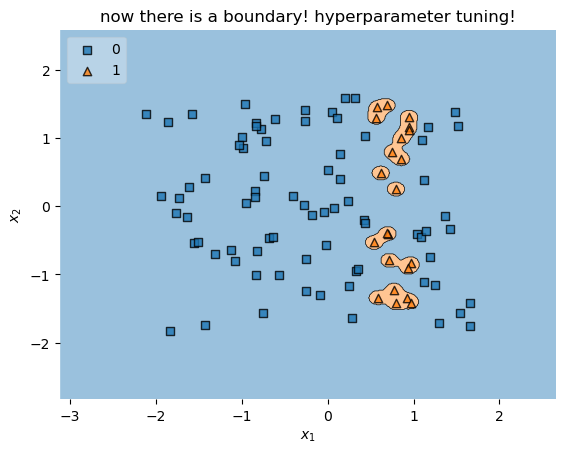

In [76]:
# Define lists to store gamma, C, and scores
gamma_list = []
C_list = []
score_list = []

# Loop through gamma and C values
for gamma in np.logspace(0, 2):
    for C in [0.1, 1.0, 10.0]:
        # Train SVM classifier
        my_clf = svm.SVC(kernel='rbf', C=C, gamma=gamma)
        my_clf.fit(XX, yy)
        
        # Save gamma, C, and score values
        gamma_list.append(gamma)
        C_list.append(C)
        score_list.append(my_clf.score(XX, yy))
        
        print(f"C = {C}", f"γ = {gamma}", "->", my_clf.score(XX,yy))

    
plot_decision_regions(XX, yy.astype(np.int_), clf=my_clf, legend=2)
plt.title("now there is a boundary! hyperparameter tuning!")
plt.ylabel('$x_2$')
plt.xlabel('$x_1$')

Text(0.5, 0, '$x_1$')

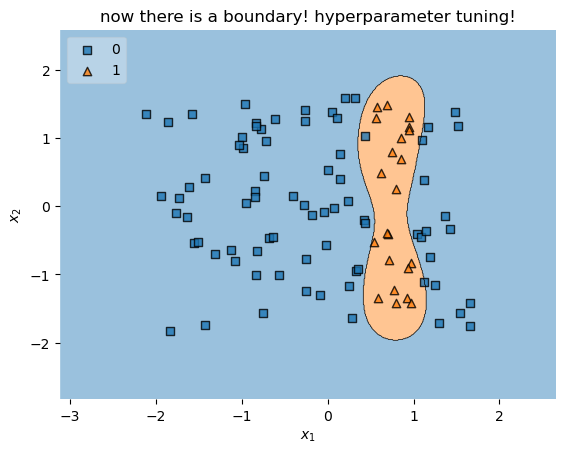

In [78]:
my_clf = svm.SVC(kernel = 'rbf', C = 10, gamma=1)
my_clf.fit(XX, yy)

plot_decision_regions(XX, yy.astype(np.int_), clf=my_clf, legend=2)
plt.title("now there is a boundary! hyperparameter tuning!")
plt.ylabel('$x_2$')
plt.xlabel('$x_1$')

Comment on what you learned here: was the dataset actually imbalanced? Or, what it that the default settings in `sklearn` were off? Or, perhaps most interesting, are the default settings in `sklearn` set to not handle unbalanced datasets very well? 

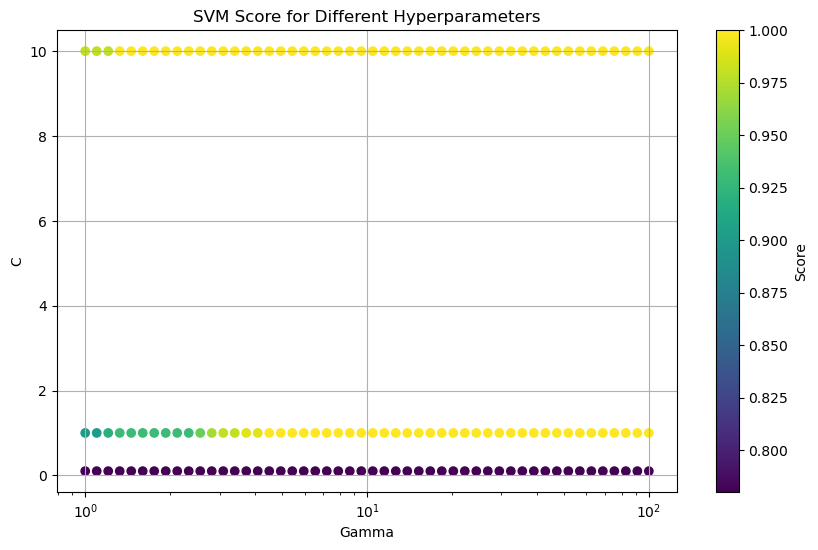

In [77]:

# Plot the results
plt.figure(figsize=(10, 6))
plt.scatter(gamma_list, C_list, c=score_list, cmap='viridis')
plt.colorbar(label='Score')
plt.xscale('log')
plt.xlabel('Gamma')
plt.ylabel('C')
plt.title('SVM Score for Different Hyperparameters')
plt.grid(True)
plt.show()

### Comments
The analysis suggests that the dataset might indeed be imbalanced, as indicated by the observation that the SVM classifier performs poorly when the value of C is low, equivalent to the baseline score. 

The default settings in scikit-learn might not be well-suited for handling imbalanced datasets, as evidenced by the suboptimal performance observed when the value of C is low.

When I play with gamma and C I found, the gamma parameter determines the influence of a single training example, with higher values leading to a more localized decision boundary and potentially more complex model. The C parameter controls the trade-off between maximizing the margin and minimizing the classification error.